In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Loading & Inspection

In [32]:
path = '../Data_Source/heart.csv'
df = pd.read_csv(path)

In [33]:
df.shape

(1025, 14)

In [34]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [35]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [36]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

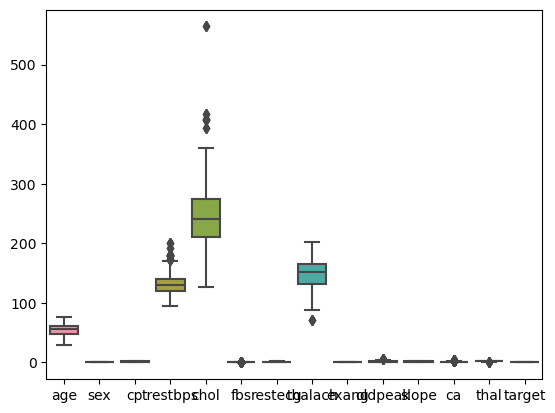

In [37]:
sns.boxplot(data=df)

In [38]:
# Outlier detection
def detect_outliers():
    outlier_percentages = {}
    original_shape = df.shape[0]
    
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (outliers_count / original_shape) * 100
        outlier_percentages[col] = round(percentage, 2)
    
    print("Outlier Percentages:")
    for col, pct in outlier_percentages.items():
        print(f"{col}: {pct}%")

In [39]:
detect_outliers()

Outlier Percentages:
age: 0.0%
sex: 0.0%
cp: 0.0%
trestbps: 2.93%
chol: 1.56%
fbs: 14.93%
restecg: 0.0%
thalach: 0.39%
exang: 0.0%
oldpeak: 0.68%
slope: 0.0%
ca: 8.49%
thal: 0.68%
target: 0.0%


In [40]:
# handling outliers by clipping
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [41]:
detect_outliers()

Outlier Percentages:
age: 0.0%
sex: 0.0%
cp: 0.0%
trestbps: 0.0%
chol: 0.0%
fbs: 0.0%
restecg: 0.0%
thalach: 0.0%
exang: 0.0%
oldpeak: 0.0%
slope: 0.0%
ca: 0.0%
thal: 0.0%
target: 0.0%


In [42]:
# Handle missing values
df.dropna(inplace=True)

In [43]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Model Building and Evaluation

In [44]:
# Define features and target variable
X = df.drop(columns=['target']) # Replace 'target' with actual target column name
y = df ['target']

In [163]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler. transform(X_test)

## Linear Kernel

In [165]:
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

In [166]:
accuracy_score(y_test, y_pred_linear)

0.8097560975609757

In [167]:
confusion_matrix(y_test, y_pred_linear)

array([[73, 29],
       [10, 93]], dtype=int64)

## Polynomial Kernal

In [168]:
# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)

In [169]:
accuracy_score(y_test, y_pred_poly)

0.9024390243902439

In [170]:
confusion_matrix(y_test, y_pred_poly)

array([[86, 16],
       [ 4, 99]], dtype=int64)

## RBF Kernal

In [171]:
# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [172]:
accuracy_score(y_test, y_pred_rbf)

0.8634146341463415

In [173]:
confusion_matrix(y_test, y_pred_rbf)

array([[84, 18],
       [10, 93]], dtype=int64)